In [1]:
#importing important libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from sklearn.preprocessing import StandardScaler
import warnings
warnings.filterwarnings('ignore')

In [2]:
# reading and loading the dataset
df = pd.read_csv(r'Automobile_insurance_fraud.csv')
df.head()

,months_as_customer,age,policy_number,policy_bind_date,policy_state,policy_csl,policy_deductable,policy_annual_premium,umbrella_limit,insured_zip,...,police_report_available,total_claim_amount,injury_claim,property_claim,vehicle_claim,auto_make,auto_model,auto_year,fraud_reported,_c39
0,328,48,521585,17-10-2014,OH,250/500,1000,1406.91,0,466132,...,YES,71610,6510,13020,52080,Saab,92x,2004,Y,NaN
1,228,42,342868,27-06-2006,IN,250/500,2000,1197.22,5000000,468176,...,?,5070,780,780,3510,Mercedes,E400,2007,Y,NaN
2,134,29,687698,06-09-2000,OH,100/300,2000,1413.14,5000000,430632,...,NO,34650,7700,3850,23100,Dodge,RAM,2007,N,NaN
3,256,41,227811,25-05-1990,IL,250/500,2000,1415.74,6000000,608117,...,NO,63400,6340,6340,50720,Chevrolet,Tahoe,2014,Y,NaN
4,228,44,367455,06-06-2014,IL,500/1000,1000,1583.91,6000000,610706,...,NO,6500,1300,650,4550,Accura,RSX,2009,N,NaN


In [3]:
#to check dimensions
df.shape

(1000, 40)

There are 1000 rows and 40 columns in the dataset.

In [4]:
#to check entries, columns, null values, datatypes, memory, etc
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 40 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   months_as_customer           1000 non-null   int64  
 1   age                          1000 non-null   int64  
 2   policy_number                1000 non-null   int64  
 3   policy_bind_date             1000 non-null   object 
 4   policy_state                 1000 non-null   object 
 5   policy_csl                   1000 non-null   object 
 6   policy_deductable            1000 non-null   int64  
 7   policy_annual_premium        1000 non-null   float64
 8   umbrella_limit               1000 non-null   int64  
 9   insured_zip                  1000 non-null   int64  
 10  insured_sex                  1000 non-null   object 
 11  insured_education_level      1000 non-null   object 
 12  insured_occupation           1000 non-null   object 
 13  insured_hobbies    

There are 2 columns of float64 datatype, 17 columns of int64 datatype and 21 columns of object datatypes.

In [5]:
#dropping the unwanted column
df.drop('_c39', axis=1, inplace=True)

In [6]:
#to check datatypes of all the columns of the dataset
df.dtypes

months_as_customer               int64
age                              int64
policy_number                    int64
policy_bind_date                object
policy_state                    object
policy_csl                      object
policy_deductable                int64
policy_annual_premium          float64
umbrella_limit                   int64
insured_zip                      int64
insured_sex                     object
insured_education_level         object
insured_occupation              object
insured_hobbies                 object
insured_relationship            object
capital-gains                    int64
capital-loss                     int64
incident_date                   object
incident_type                   object
collision_type                  object
incident_severity               object
authorities_contacted           object
incident_state                  object
incident_city                   object
incident_location               object
incident_hour_of_the_day 

In [7]:
#viewing all the columns
df.columns

Index(['months_as_customer', 'age', 'policy_number', 'policy_bind_date',
       'policy_state', 'policy_csl', 'policy_deductable',
       'policy_annual_premium', 'umbrella_limit', 'insured_zip', 'insured_sex',
       'insured_education_level', 'insured_occupation', 'insured_hobbies',
       'insured_relationship', 'capital-gains', 'capital-loss',
       'incident_date', 'incident_type', 'collision_type', 'incident_severity',
       'authorities_contacted', 'incident_state', 'incident_city',
       'incident_location', 'incident_hour_of_the_day',
       'number_of_vehicles_involved', 'property_damage', 'bodily_injuries',
       'witnesses', 'police_report_available', 'total_claim_amount',
       'injury_claim', 'property_claim', 'vehicle_claim', 'auto_make',
       'auto_model', 'auto_year', 'fraud_reported'],
      dtype='object')

In [8]:
#statistical summary
df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
months_as_customer,1000.0,2.039540e+02,1.151132e+02,0.00,115.7500,199.5,276.250,479.00
age,1000.0,3.894800e+01,9.140287e+00,19.00,32.0000,38.0,44.000,64.00
policy_number,1000.0,5.462386e+05,2.570630e+05,100804.00,335980.2500,533135.0,759099.750,999435.00
policy_deductable,1000.0,1.136000e+03,6.118647e+02,500.00,500.0000,1000.0,2000.000,2000.00
policy_annual_premium,1000.0,1.256406e+03,2.441674e+02,433.33,1089.6075,1257.2,1415.695,2047.59
umbrella_limit,1000.0,1.101000e+06,2.297407e+06,-1000000.00,0.0000,0.0,0.000,10000000.00
insured_zip,1000.0,5.012145e+05,7.170161e+04,430104.00,448404.5000,466445.5,603251.000,620962.00
capital-gains,1000.0,2.512610e+04,2.787219e+04,0.00,0.0000,0.0,51025.000,100500.00
capital-loss,1000.0,-2.679370e+04,2.810410e+04,-111100.00,-51500.0000,-23250.0,0.000,0.00
incident_hour_of_the_day,1000.0,1.164400e+01,6.951373e+00,0.00,6.0000,12.0,17.000,23.00


In [9]:
#check duplicate columns
df.duplicated().sum()

0

There are no duplicate columns in the dataset.

# EDA

In [10]:
#to check null values
df.isnull().sum()

months_as_customer             0
age                            0
policy_number                  0
policy_bind_date               0
policy_state                   0
policy_csl                     0
policy_deductable              0
policy_annual_premium          0
umbrella_limit                 0
insured_zip                    0
insured_sex                    0
insured_education_level        0
insured_occupation             0
insured_hobbies                0
insured_relationship           0
capital-gains                  0
capital-loss                   0
incident_date                  0
incident_type                  0
collision_type                 0
incident_severity              0
authorities_contacted          0
incident_state                 0
incident_city                  0
incident_location              0
incident_hour_of_the_day       0
number_of_vehicles_involved    0
property_damage                0
bodily_injuries                0
witnesses                      0
police_rep

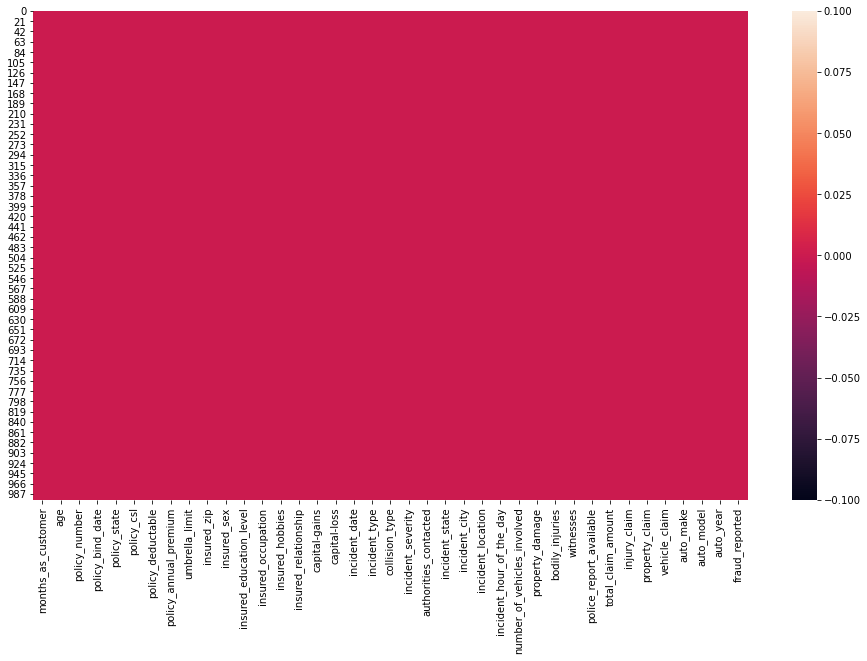

In [11]:
#another way to check missing values
plt.figure(figsize=(16,9))
sns.heatmap(df.isnull())
plt.show()                  

#visualizing null values using heatmap

There are no null values in the given dataset.

In [12]:
df['fraud_reported'].value_counts()

N    753
Y    247
Name: fraud_reported, dtype: int64

In [13]:
fraud=df[df['fraud_reported']=='Y']

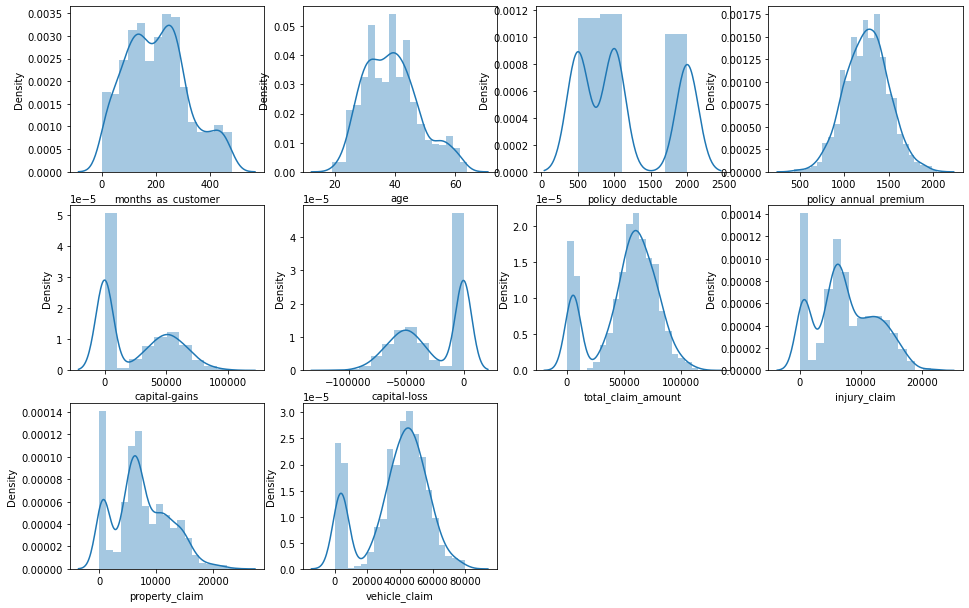

In [14]:
#visualising given columns by distribution plots
col=['months_as_customer','age','policy_deductable','policy_annual_premium','capital-gains','capital-loss','total_claim_amount','injury_claim','property_claim','vehicle_claim']


plt.figure(figsize=(16,14))
k=1
for i in col :
    plt.subplot(4,4,k)
    sns.distplot(df[i])
    k=k+1
plt.show()

All the above data are almost normally distributed

In [15]:
df['umbrella_limit'].value_counts()

 0           798
 6000000      57
 5000000      46
 4000000      39
 7000000      29
 3000000      12
 8000000       8
 9000000       5
 2000000       3
 10000000      2
-1000000       1
Name: umbrella_limit, dtype: int64

In [16]:
a=df[df['umbrella_limit'] >0]

<AxesSubplot:xlabel='umbrella_limit', ylabel='Density'>

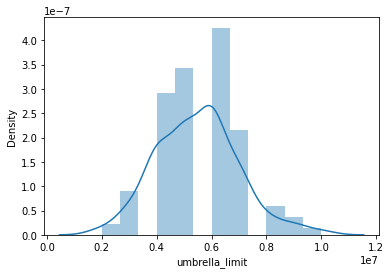

In [17]:
#visualisation of "umbrella limit" column by distribution plot
sns.distplot(a['umbrella_limit'])               

#univariant

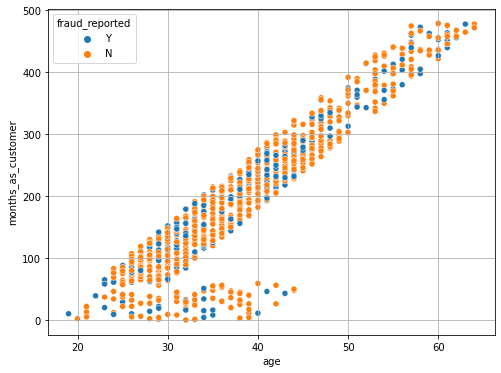

In [18]:
#Visualisation by using scatterplot "age" on x axis and "months_as_customer" on y axis
plt.figure(figsize=(8,6))
sns.scatterplot(x='age', y='months_as_customer',hue='fraud_reported',data=df)     #binary variant
plt.grid(True)
plt.show()

We do not have any pattern which justifies if customers with more years with the company are claiming fraud insurance.

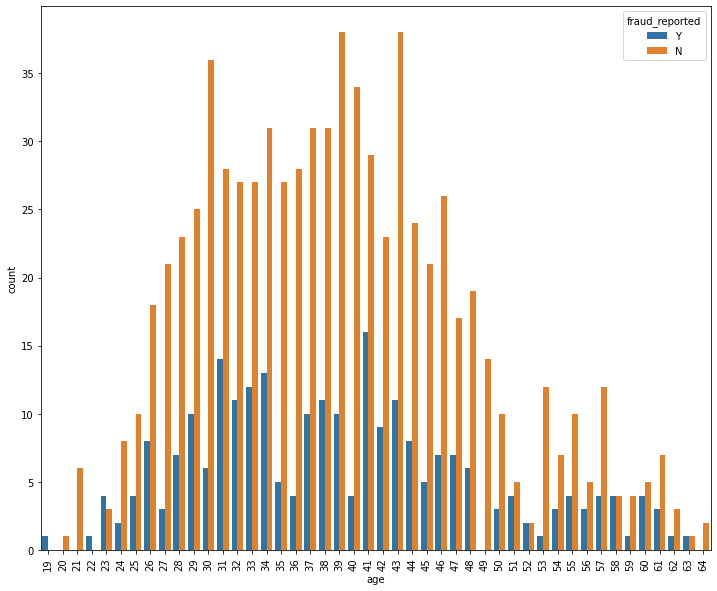

In [19]:
#visualisation of "age" by using countplot
plt.figure(figsize=(12,10))
sns.countplot(x='age',hue='fraud_reported',data=df)          #univariant
plt.xticks(rotation=90)
plt.show()

In [20]:
#sorting columns by descending order
a=df[df['fraud_reported'] == 'Y']
a[['policy_number','insured_occupation','insured_education_level','total_claim_amount']].sort_values('total_claim_amount',ascending=False)[:20]

,policy_number,insured_occupation,insured_education_level,total_claim_amount
149,217938,craft-repair,JD,112320
163,346940,prof-specialty,Masters,107900
479,753844,sales,MD,104610
145,515050,exec-managerial,Associate,99320
247,187775,other-service,JD,98670
91,127754,tech-support,Associate,98340
974,291006,transport-moving,JD,98280
23,115399,priv-house-serv,MD,98160
41,616337,transport-moving,Associate,97080
796,728025,machine-op-inspct,Masters,92730


We have top 20 fraud claims with policy number and their occupation listed Policy number 217938 has claimed highest amount of 112320$ and is working as craft-repair

In [21]:
a['insured_education_level'].value_counts()
a['insured_occupation'].value_counts()

exec-managerial      28
tech-support         22
craft-repair         22
machine-op-inspct    22
sales                21
transport-moving     21
prof-specialty       18
armed-forces         17
farming-fishing      16
protective-serv      14
priv-house-serv      12
other-service        12
adm-clerical         11
handlers-cleaners    11
Name: insured_occupation, dtype: int64

People who are working as exec-manager has claimed more fraud transactions

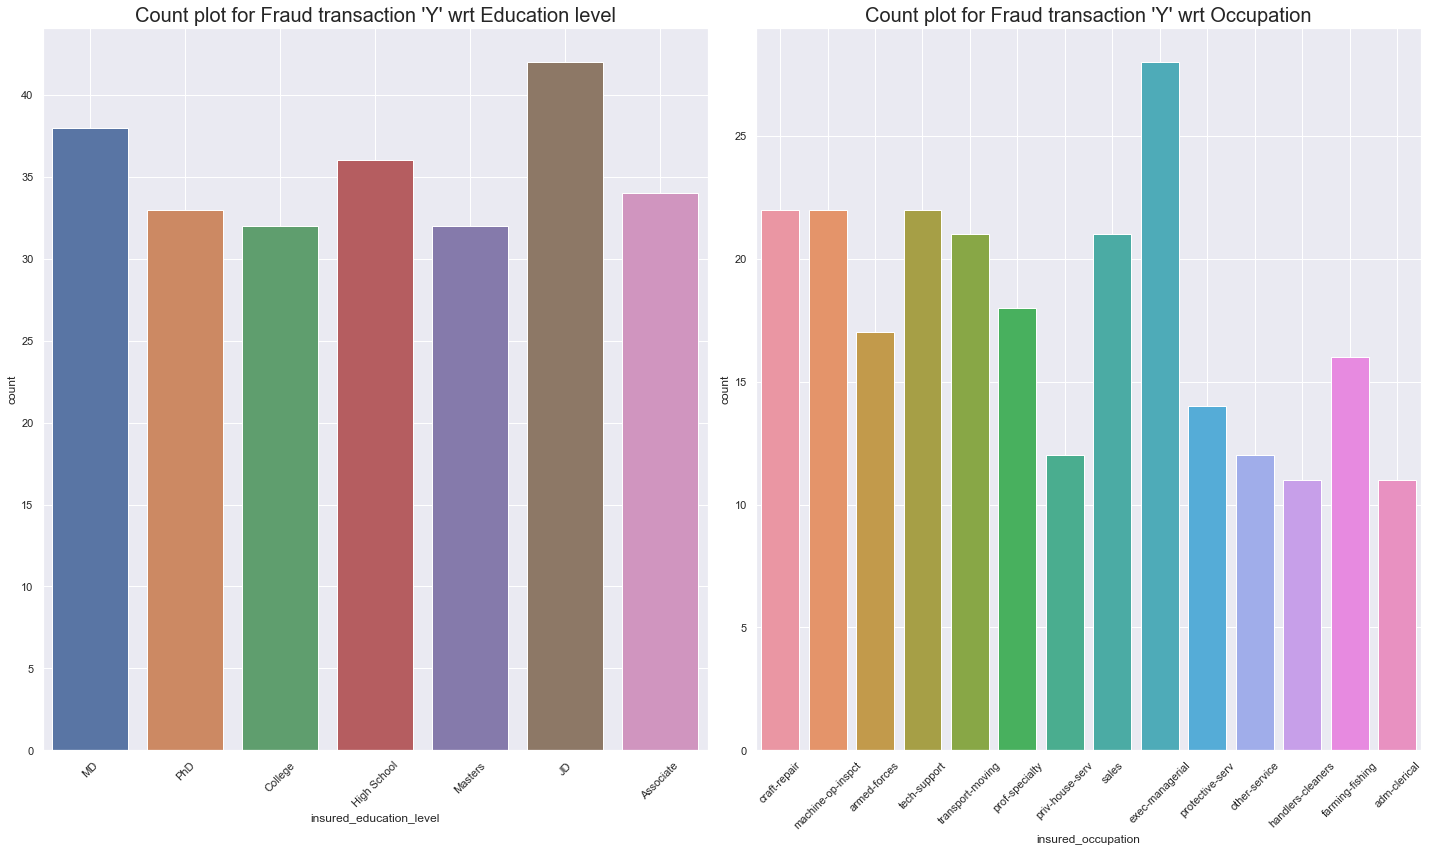

In [22]:
#visualising "insured_education_level" and "insured_occupation" by using countplot
sns.set(style="darkgrid")

plt.figure(figsize=(20,12))
plt.subplot(1,2,1)
plt.title("Count plot for Fraud transaction 'Y' wrt Education level",fontsize=20)
sns.countplot('insured_education_level',data=a)      #univariant
plt.xticks(rotation=45)
plt.grid(True)
plt.tight_layout()
plt.subplot(1,2,2)
plt.title("Count plot for Fraud transaction 'Y' wrt Occupation",fontsize=20)
sns.countplot('insured_occupation',data=a)               #univariant
plt.xticks(rotation=45)
plt.grid(True)
plt.tight_layout()
plt.show()

People with occupation as Exec Manager seems to be doing more fraud transactions and people with JD level of education are also involved in more fraud transactions. Comparitively people with less education are claiming more fraud claims.

In [23]:
#Looking at below claims
a_claims=pd.pivot_table(a,values='total_claim_amount',index=['insured_occupation','insured_education_level']).sort_values('total_claim_amount',ascending=False)

cm = sns.light_palette("blue", as_cmap=True)
a_claims.style.background_gradient(cmap=cm)

People from occupation sector Protective-services and education level of JD has highest fraud claimed amount of 87,890$

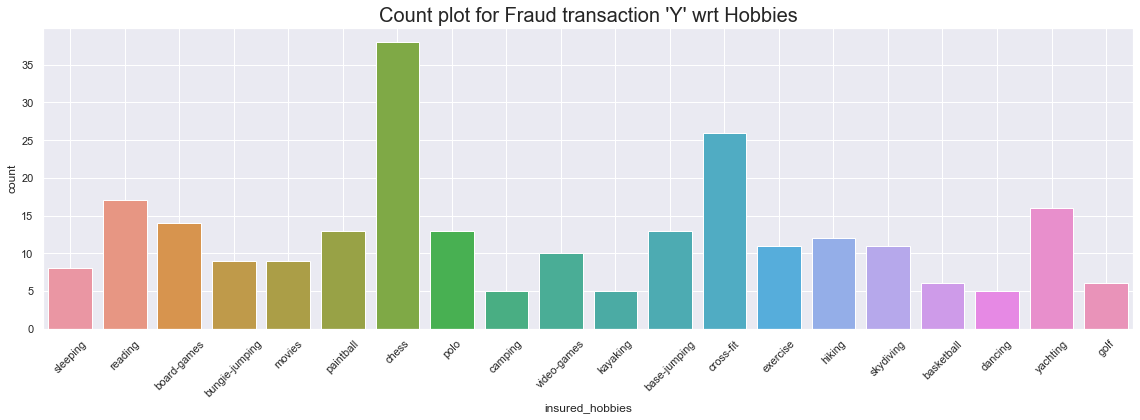

In [24]:
#visualising "insured_hobbies" by using countplot
plt.figure(figsize=(16,6))
plt.title("Count plot for Fraud transaction 'Y' wrt Hobbies",fontsize=20)
sns.countplot('insured_hobbies',data=a)           #univariant
plt.xticks(rotation=45)
plt.grid(True)
plt.tight_layout()
plt.show()

People who play more chess have claimed more fraud followed by crossfit

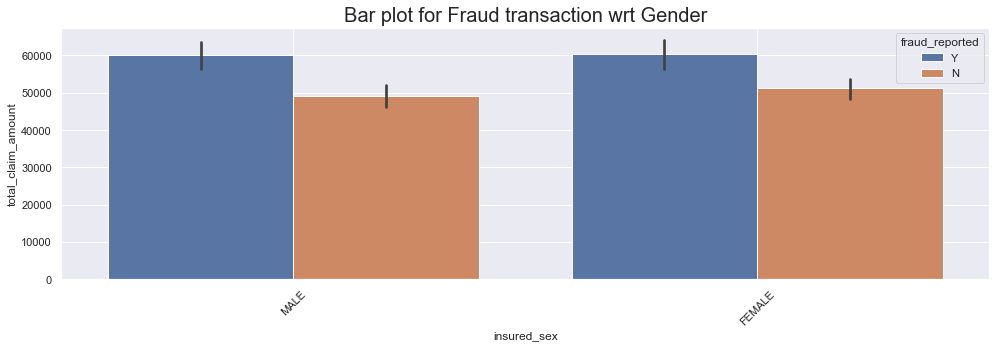

In [25]:
#visualisation of "insured_sex" on x axis and "total_claim_amount" on y axis by using barplot
plt.figure(figsize=(14,5))
plt.title("Bar plot for Fraud transaction wrt Gender",fontsize=20)
sns.barplot(x='insured_sex',y='total_claim_amount',hue='fraud_reported',data=df)      #bivariant
plt.xticks(rotation=45)
plt.grid(True)
plt.tight_layout()
plt.show()

Both Male and female have caimed same amount which are fraud

In [26]:
a['insured_relationship'].value_counts()

other-relative    52
not-in-family     45
wife              42
own-child         39
husband           35
unmarried         34
Name: insured_relationship, dtype: int64

In [27]:
profit=df['capital-gains']-df['capital-loss']
df1=df
df1['profit']=profit

In [28]:
#viewing columns
df1.columns

Index(['months_as_customer', 'age', 'policy_number', 'policy_bind_date',
       'policy_state', 'policy_csl', 'policy_deductable',
       'policy_annual_premium', 'umbrella_limit', 'insured_zip', 'insured_sex',
       'insured_education_level', 'insured_occupation', 'insured_hobbies',
       'insured_relationship', 'capital-gains', 'capital-loss',
       'incident_date', 'incident_type', 'collision_type', 'incident_severity',
       'authorities_contacted', 'incident_state', 'incident_city',
       'incident_location', 'incident_hour_of_the_day',
       'number_of_vehicles_involved', 'property_damage', 'bodily_injuries',
       'witnesses', 'police_report_available', 'total_claim_amount',
       'injury_claim', 'property_claim', 'vehicle_claim', 'auto_make',
       'auto_model', 'auto_year', 'fraud_reported', 'profit'],
      dtype='object')

In [29]:
#sorting "policy_number" and "profit" by descending order
df[['policy_number','profit']].sort_values('profit',ascending=False)[0:20]

,policy_number,profit
807,250833,192000
533,840806,164100
59,485372,153300
679,774303,151100
353,958785,150600
523,190588,149400
613,831053,148000
846,545506,142500
507,925128,142300
598,507545,141600


In [30]:
df[['incident_date', 'incident_type', 'collision_type', 'incident_severity',
       'authorities_contacted', 'incident_state', 'incident_city',
       'incident_location', 'incident_hour_of_the_day',
       'number_of_vehicles_involved']]

,incident_date,incident_type,collision_type,incident_severity,authorities_contacted,incident_state,incident_city,incident_location,incident_hour_of_the_day,number_of_vehicles_involved
0,25-01-2015,Single Vehicle Collision,Side Collision,Major Damage,Police,SC,Columbus,9935 4th Drive,5,1
1,21-01-2015,Vehicle Theft,?,Minor Damage,Police,VA,Riverwood,6608 MLK Hwy,8,1
2,22-02-2015,Multi-vehicle Collision,Rear Collision,Minor Damage,Police,NY,Columbus,7121 Francis Lane,7,3
3,10-01-2015,Single Vehicle Collision,Front Collision,Major Damage,Police,OH,Arlington,6956 Maple Drive,5,1
4,17-02-2015,Vehicle Theft,?,Minor Damage,None,NY,Arlington,3041 3rd Ave,20,1
...,...,...,...,...,...,...,...,...,...,...
995,22-02-2015,Single Vehicle Collision,Front Collision,Minor Damage,Fire,NC,Northbrook,6045 Andromedia St,20,1
996,24-01-2015,Single Vehicle Collision,Rear Collision,Major Damage,Fire,SC,Northbend,3092 Texas Drive,23,1
997,23-01-2015,Multi-vehicle Collision,Side Collision,Minor Damage,Police,NC,Arlington,7629 5th St,4,3
998,26-02-2015,Single Vehicle Collision,Rear Collision,Major Damage,Other,NY,Arlington,6128 Elm Lane,2,1


In [31]:
#sorting columns by descending order
pd.pivot_table(a,values=['number_of_vehicles_involved','total_claim_amount','vehicle_claim','incident_hour_of_the_day'],index=['incident_type','collision_type']).sort_values('vehicle_claim',ascending=False)

incident_hour_of_the_day  \
incident_type            collision_type                              
Single Vehicle Collision Front Collision                 11.595238   
                         Side Collision                  11.787879   
                         Rear Collision                  11.071429   
Multi-vehicle Collision  Side Collision                  11.432432   
                         Front Collision                 11.892857   
                         Rear Collision                  14.142857   
Parked Car               ?                                7.000000   
Vehicle Theft            ?                                5.375000   

                                          number_of_vehicles_involved  \
incident_type            collision_type                                 
Single Vehicle Collision Front Collision                     1.000000   
                         Side Collision                      1.000000   
                         Rear Collision                      1.000000   
Multi-vehicle Collision  Side Collision                      2.972973   
                         Front Collision                     2.964286   
                         Rear Collision                      3.081633   
Parked Car               ?                                   1.000000   
Vehicle Theft            ?                                   1.000000   

                                          total_claim_amount  vehicle_claim  
incident_type            collision_type                                      
Single Vehicle Collision Front Collision        66596.190476   49030.000000  
                         Side Collision         68009.696970   48481.212121  
                         Rear Collision         65782.857143   47616.666667  
Multi-vehicle Collision  Side Collision         62281.621622   45308.648649  
                         Front Collision        60970.000000   43860.000000  
                         Rear Collision         61152.448980   43474.693878  
Parked Car               ?                       5093.750000    3711.250000  
Vehicle Theft            ?                       5197.500000    3665.000000

For auto claims, single vehicle side collision have claimed highest

In [32]:
df['number_of_vehicles_involved'].value_counts()

1    581
3    358
4     31
2     30
Name: number_of_vehicles_involved, dtype: int64

In [33]:
df['incident_type'].value_counts()

Multi-vehicle Collision     419
Single Vehicle Collision    403
Vehicle Theft                94
Parked Car                   84
Name: incident_type, dtype: int64

In [34]:
df['collision_type'].value_counts()

Rear Collision     292
Side Collision     276
Front Collision    254
?                  178
Name: collision_type, dtype: int64

In [35]:
# For collision type we have few ? values, which are nan values and has to be replaced/removed
#Let us see for what kind of incident we have for value ?
coll=a[['incident_type','collision_type']]

In [36]:
res=coll.loc[coll['collision_type']=='?']

In [37]:
res['incident_type'].value_counts()

Parked Car       8
Vehicle Theft    8
Name: incident_type, dtype: int64

8 Cars which are parked and 8 cars which are theft have claimed fraud.

In [38]:
coll_df=df[['incident_type','collision_type']]

In [39]:
res_df=coll_df.loc[coll_df['collision_type']=='?']

In [40]:
res_df['incident_type'].value_counts()

Vehicle Theft    94
Parked Car       84
Name: incident_type, dtype: int64

Cars which are theft and Parked are marked as ?, we can replace them wiht either NA or No collisison

In [41]:
df['collision_type']=df['collision_type'].replace("?","Not Applicable")

In [42]:
df['collision_type'].value_counts()

Rear Collision     292
Side Collision     276
Front Collision    254
Not Applicable     178
Name: collision_type, dtype: int64

In [43]:
a['incident_city'].value_counts()

Arlington      44
Columbus       39
Springfield    38
Hillsdale      35
Northbend      34
Riverwood      30
Northbrook     27
Name: incident_city, dtype: int64

People from Arlington have more auto related incidents which are claimed to be fraud

In [44]:
#indexing and sorting by descending order
pd.pivot_table(a,values=['total_claim_amount','vehicle_claim'],index=['incident_state','incident_city']).sort_values('total_claim_amount',ascending=False)[:20]

,,total_claim_amount,vehicle_claim
incident_state,incident_city,,
SC,Riverwood,78980.000000,56553.333333
OH,Columbus,78100.000000,54670.000000
NC,Northbrook,76653.333333,55346.666667
WV,Northbrook,75205.000000,53997.500000
SC,Springfield,73116.666667,50267.500000
NY,Northbrook,69730.000000,50758.571429
NC,Springfield,69270.000000,51032.000000
NY,Springfield,67157.000000,47976.000000
OH,Northbrook,66550.000000,46585.000000


Riverwood city from SC state have claimed maximum amount of fraud for auto insurance

In [45]:
#viewing columns
df.columns

Index(['months_as_customer', 'age', 'policy_number', 'policy_bind_date',
       'policy_state', 'policy_csl', 'policy_deductable',
       'policy_annual_premium', 'umbrella_limit', 'insured_zip', 'insured_sex',
       'insured_education_level', 'insured_occupation', 'insured_hobbies',
       'insured_relationship', 'capital-gains', 'capital-loss',
       'incident_date', 'incident_type', 'collision_type', 'incident_severity',
       'authorities_contacted', 'incident_state', 'incident_city',
       'incident_location', 'incident_hour_of_the_day',
       'number_of_vehicles_involved', 'property_damage', 'bodily_injuries',
       'witnesses', 'police_report_available', 'total_claim_amount',
       'injury_claim', 'property_claim', 'vehicle_claim', 'auto_make',
       'auto_model', 'auto_year', 'fraud_reported', 'profit'],
      dtype='object')

In [46]:
a.loc[(a['property_claim'] == 0.0 )&(a['vehicle_claim'] != 0.0 )]

,months_as_customer,age,policy_number,policy_bind_date,policy_state,policy_csl,policy_deductable,policy_annual_premium,umbrella_limit,insured_zip,...,witnesses,police_report_available,total_claim_amount,injury_claim,property_claim,vehicle_claim,auto_make,auto_model,auto_year,fraud_reported
60,154,34,598554,14-02-1990,IN,100/300,500,795.23,0,609216,...,1,?,69480,15440,0,54040,Nissan,Maxima,2014,Y
155,375,50,120485,18-02-2007,OH,100/300,1000,1275.39,0,466283,...,3,NO,37280,0,0,37280,Audi,A5,1996,Y
705,274,45,589094,27-05-2003,IN,250/500,1000,1353.53,0,451467,...,0,NO,58500,11700,0,46800,Accura,MDX,1995,Y
803,123,29,379268,05-08-2012,IN,250/500,500,1209.63,0,447188,...,0,YES,73260,16280,0,56980,Volkswagen,Jetta,2014,Y
843,297,48,264221,28-07-2014,IL,500/1000,1000,1243.68,0,463331,...,2,?,54960,6870,0,48090,Toyota,Corolla,2002,Y
938,147,31,746630,10-02-1997,IN,250/500,500,1054.92,6000000,468232,...,0,?,68240,8530,0,59710,Toyota,Corolla,2013,Y


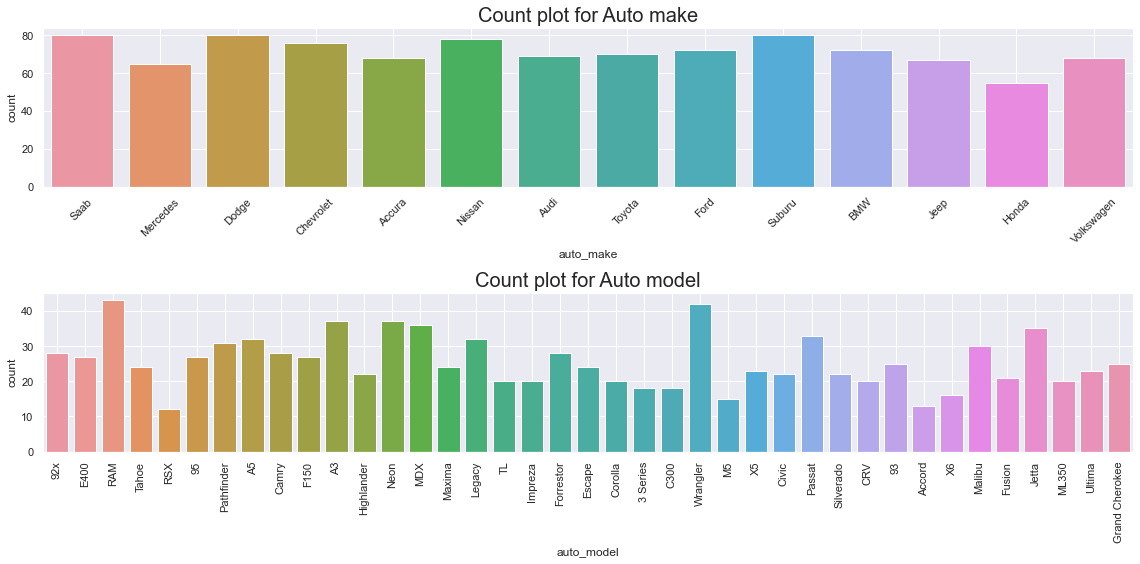

In [47]:
#visualisation of "auto_make" and "auto_model" by using countplot
plt.figure(figsize=(16,8))
plt.subplot(2,1,1)
plt.title("Count plot for Auto make",fontsize=20)
sns.countplot('auto_make',data=df)        #univariant
plt.xticks(rotation=45)
plt.grid(True)
plt.tight_layout()
plt.subplot(2,1,2)
plt.title("Count plot for Auto model",fontsize=20)
sns.countplot('auto_model',data=df)           #univariant
plt.xticks(rotation=90)
plt.grid(True)
plt.tight_layout()
plt.show()

In [48]:
a['auto_make'].value_counts()

Mercedes      22
Ford          22
Chevrolet     21
Audi          21
Dodge         20
BMW           20
Suburu        19
Volkswagen    19
Saab          18
Nissan        14
Honda         14
Accura        13
Toyota        13
Jeep          11
Name: auto_make, dtype: int64

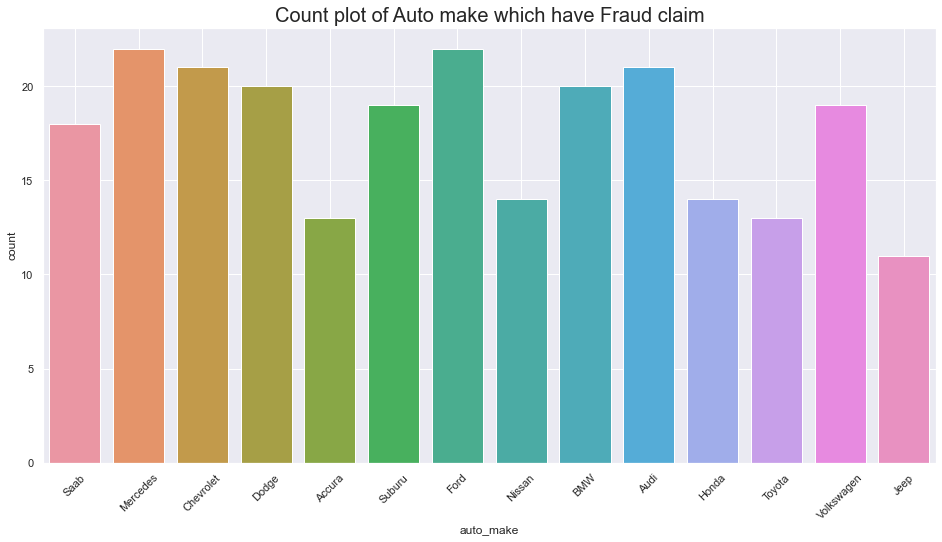

In [49]:
#visualising "auto_make" by using countplot
plt.figure(figsize=(16,8))
plt.title("Count plot of Auto make which have Fraud claim",fontsize=20)
sns.countplot('auto_make',data=a)          #univariant
plt.xticks(rotation=45)
plt.grid(True)
plt.show()

Auto make of 'Ford' and 'Mercedes' are having highest Fraud claim, 'Chevorlet' and 'Audi' also seems to be claimed equally having Fraud claims

In [50]:
#indexing and sorting columns by descending order
pd.pivot_table(a,values=['vehicle_claim'],index=['auto_model','auto_make','policy_number']).sort_values('vehicle_claim',ascending=False)[0:10]

,,,vehicle_claim
auto_model,auto_make,policy_number,
Impreza,Suburu,217938,77760
TL,Accura,515050,76400
Tahoe,Chevrolet,291006,75600
Neon,Dodge,346940,75530
RAM,Dodge,115399,73620
Accord,Honda,127754,71520
Highlander,Toyota,209177,69210
Tahoe,Chevrolet,187775,68310
Escape,Ford,626208,67590


Policy# 217938 who have Impreza-Suburu has claimed amount of 77,760$ and is identified as Fraud claim.

In [51]:
#viewing columns
df.columns

Index(['months_as_customer', 'age', 'policy_number', 'policy_bind_date',
       'policy_state', 'policy_csl', 'policy_deductable',
       'policy_annual_premium', 'umbrella_limit', 'insured_zip', 'insured_sex',
       'insured_education_level', 'insured_occupation', 'insured_hobbies',
       'insured_relationship', 'capital-gains', 'capital-loss',
       'incident_date', 'incident_type', 'collision_type', 'incident_severity',
       'authorities_contacted', 'incident_state', 'incident_city',
       'incident_location', 'incident_hour_of_the_day',
       'number_of_vehicles_involved', 'property_damage', 'bodily_injuries',
       'witnesses', 'police_report_available', 'total_claim_amount',
       'injury_claim', 'property_claim', 'vehicle_claim', 'auto_make',
       'auto_model', 'auto_year', 'fraud_reported', 'profit'],
      dtype='object')

In [52]:
a['bodily_injuries'].value_counts()

2    90
0    80
1    77
Name: bodily_injuries, dtype: int64

In [53]:
a['police_report_available'].value_counts()

?      89
NO     86
YES    72
Name: police_report_available, dtype: int64

Even for the policies which have police report have done fraud claims

In [54]:
df['police_report_available']=df['police_report_available'].replace("?","Unknown")

In [55]:
#viewing columns
df.columns

Index(['months_as_customer', 'age', 'policy_number', 'policy_bind_date',
       'policy_state', 'policy_csl', 'policy_deductable',
       'policy_annual_premium', 'umbrella_limit', 'insured_zip', 'insured_sex',
       'insured_education_level', 'insured_occupation', 'insured_hobbies',
       'insured_relationship', 'capital-gains', 'capital-loss',
       'incident_date', 'incident_type', 'collision_type', 'incident_severity',
       'authorities_contacted', 'incident_state', 'incident_city',
       'incident_location', 'incident_hour_of_the_day',
       'number_of_vehicles_involved', 'property_damage', 'bodily_injuries',
       'witnesses', 'police_report_available', 'total_claim_amount',
       'injury_claim', 'property_claim', 'vehicle_claim', 'auto_make',
       'auto_model', 'auto_year', 'fraud_reported', 'profit'],
      dtype='object')

In [57]:
df['umbrella_limit']=df['umbrella_limit'].replace(-1000000,0)

In [58]:
df2=df

In [59]:
#droping columns
df2=df2.drop(['policy_number','policy_bind_date','insured_zip','incident_date','authorities_contacted','profit','auto_make','auto_model'],axis=1)

In [60]:
#viewing columns
df2.columns

Index(['months_as_customer', 'age', 'policy_state', 'policy_csl',
       'policy_deductable', 'policy_annual_premium', 'umbrella_limit',
       'insured_sex', 'insured_education_level', 'insured_occupation',
       'insured_hobbies', 'insured_relationship', 'capital-gains',
       'capital-loss', 'incident_type', 'collision_type', 'incident_severity',
       'incident_state', 'incident_city', 'incident_location',
       'incident_hour_of_the_day', 'number_of_vehicles_involved',
       'property_damage', 'bodily_injuries', 'witnesses',
       'police_report_available', 'total_claim_amount', 'injury_claim',
       'property_claim', 'vehicle_claim', 'auto_year', 'fraud_reported'],
      dtype='object')

In [61]:
df2=pd.get_dummies(df2,columns=['policy_state','policy_csl','insured_sex','insured_education_level','insured_occupation',
                                'insured_hobbies','insured_relationship','incident_type','collision_type','incident_severity','incident_state',
                                'incident_city','incident_location','property_damage','police_report_available'],drop_first=True)

In [62]:
#checking dimensions
df2.shape

(1000, 1089)

In [63]:
#viewing columns
df2.columns

Index(['months_as_customer', 'age', 'policy_deductable',
       'policy_annual_premium', 'umbrella_limit', 'capital-gains',
       'capital-loss', 'incident_hour_of_the_day',
       'number_of_vehicles_involved', 'bodily_injuries',
       ...
       'incident_location_9918 Andromedia Drive',
       'incident_location_9929 Rock Drive', 'incident_location_9935 4th Drive',
       'incident_location_9942 Tree Ave', 'incident_location_9980 Lincoln Ave',
       'incident_location_9988 Rock Ridge', 'property_damage_NO',
       'property_damage_YES', 'police_report_available_Unknown',
       'police_report_available_YES'],
      dtype='object', length=1089)

In [64]:
#dropping "fraud_reported" column
x=df2.drop(['fraud_reported'],axis=1)

In [65]:
y=df2['fraud_reported']

# Over sampling

In [ ]:
#over sampling by using SMOTE
from imblearn.over_sampling import SMOTE

x_upsample, y_upsample  = SMOTE().fit_resample(x, y)

print(x_upsample.shape)
print(y_upsample.shape)

In [ ]:
y_upsample.value_counts()

# Scaling

In [75]:
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()

In [ ]:
x_scale=sc.fit_transform(x_upsample)

# PCA

In [ ]:
from sklearn.decomposition import PCA
pca=PCA(n_components=0.95)
x_scaled=pca.fit_transform(x_scale)

In [ ]:
r=pca.explained_variance_ratio_

In [ ]:
np.sum(r)

In [ ]:
len(r)

# Selecting the model

In [ ]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x_scaled,y_upsample,test_size=0.3)

# Random Forest

In [83]:
from sklearn.ensemble import RandomForestClassifier

In [84]:
rf=RandomForestClassifier()

# Hyperparamenter tuning

In [85]:
from sklearn.model_selection import GridSearchCV
parameters={'criterion':['gini','entropy'], 'max_depth': np.arange(1,30)}

In [86]:
grid=GridSearchCV(rf,parameters)

In [ ]:
grid.fit(x_train,y_train)

In [ ]:
model=grid.best_estimator_

In [ ]:
grid.best_score_

In [ ]:
y_pred=model.predict(x_test)

In [ ]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test,y_pred)

In [ ]:
from sklearn.metrics import confusion_matrix,classification_report

#visualisation of confusion matrix by using heatmap
cm=confusion_matrix(y_pred,y_test)
sns.heatmap(cm,annot=True)

In [ ]:
clf=classification_report(y_pred,y_test)
print(clf)

# Cross Validation

In [ ]:
from sklearn.model_selection import cross_val_score
cross_val=cross_val_score(model,x_train,y_train,cv=10)

In [ ]:
print(cross_val)

In [ ]:
print("Acccuracy of the model is :", np.mean(cross_val))

# Saving the Model:

In [ ]:
import joblib
joblib.dump(model, "Insurance Claim Fraud Detection.pkl")  

#saving model as a joblib

# Conclusion:

In [ ]:
a=np.array(y_test)
predicted=np.array(model.predict(x_test))
df_com=pd.DataFrame({"Original":a, "Predicted":predicted}, index=range(len(a))) #creating data frame 
df_com

# Loading the saved data:

In [ ]:
mod=joblib.load('Insurance Claim Fraud Detection.pkl')

In [ ]:
prediction= mod.predict(x_test)
prediction=pd.DataFrame(prediction)  #converting into dataframe
prediction.to_csv("Results.csv", index=False)